In [463]:
#library import
import numpy as np
import pandas as pd
import sklearn

In [464]:
#load dataset and dividing it 
f = pd.read_csv("in_ml.csv")
X = f.iloc[:, 0:5].values
y = f.iloc[:, 5].values

In [924]:
#splitting dataset
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=31)  

In [947]:
#importing models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier  

In [948]:
#scaling
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    


In [949]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=5)
# SVM
model3 = svm.SVC(kernel='rbf', probability = True, gamma = 'auto')
#decision tree
model4= DecisionTreeClassifier(criterion='entropy')  
  


In [950]:
#fitting models
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [953]:
#predicting the test set and probability score
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)
pred4 = model4.predict(x_test)
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
pred_prob3 = model3.predict_proba(x_test)
pred_prob4 = model4.predict_proba(x_test)
#print(pred1,y_test,pred_prob1)


In [954]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [957]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

# Accuracy
acc2 = accuracy_score(y_test, pred2)
acc1 = accuracy_score(y_test, pred1)
acc3 = accuracy_score(y_test, pred3)
acc4 = accuracy_score(y_test, pred4)
print("KNN accuracy:", acc2, "SVM accuracy:", acc3, "Logistic regression accuracy:", acc1, "DT accuracy", acc4)

KNN accuracy: 0.7692307692307693 SVM accuracy: 0.8461538461538461 Logistic regression accuracy: 0.8461538461538461 DT accuracy 0.6153846153846154


KNN auc_score: 0.7625000000000001 SVM auc_score: 0.95 Logistic auc_score: 0.8 DT auc_score 0.65


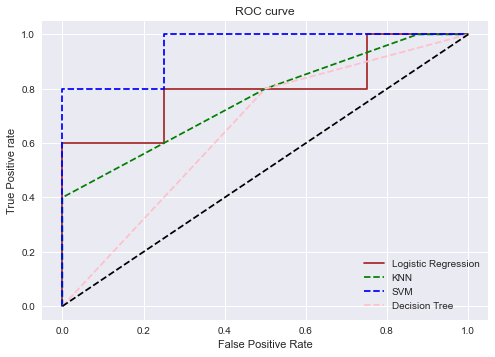

In [958]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
print("KNN auc_score:", auc_score2, "SVM auc_score:", auc_score3, "Logistic auc_score:", auc_score1, "DT auc_score", auc_score4)
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='brown', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();